# WeatherPy
----

#### Submitted by Farshad Esnaashari


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save base url information
url = "http://api.openweathermap.org/data/2.5/weather?"

In [4]:
#create a function to convert Kalvin to Fahrenheit
def k_to_f(k_temp):
    f_temp = 9/5*(k_temp - 273) + 32
    return round(f_temp)    

In [5]:
# set counter variables for printing the status of data processing
record=0
dataset=1

# create emply lists for all the data items
max_temp=[]
humidity=[]
windspeed=[]
cloudiness=[]
name=[]
country=[]
lat=[]
lon=[]
record_date=[]


# Loop through the cities
for city in cities:
    record +=1
    
    # pause for 5 seconds after a set of 50 records are processed
    if (np.mod(record,50) == 0):
        time.sleep(5)
        dataset +=1
        record =0
    try:
        print(f" processing record {record} of set {dataset } | {city}")
        city_url=url + "appid=" + api_key + "&q=" + city
        weather_response=requests.get(city_url).json()
        name.append(weather_response['name'])
        record_date.append(weather_response['dt'])
        max_temp.append(k_to_f(weather_response['main']['temp_max']))
        humidity.append(weather_response['main']['humidity'])
        windspeed.append(weather_response['wind']['speed'])
        cloudiness.append(weather_response['clouds']['all'])
        country.append(weather_response['sys']['country'])
        lat.append(weather_response['coord']['lat'])
        lon.append(weather_response['coord']['lon'])
    except (KeyError, IndexError):
        print("City not found, skipping...")
    

 processing record 1 of set 1 | mareeba
 processing record 2 of set 1 | albany
 processing record 3 of set 1 | anori
 processing record 4 of set 1 | new norfolk
 processing record 5 of set 1 | castro
 processing record 6 of set 1 | iberia
 processing record 7 of set 1 | cidreira
 processing record 8 of set 1 | cape town
 processing record 9 of set 1 | halifax
 processing record 10 of set 1 | butaritari
 processing record 11 of set 1 | leningradskiy
 processing record 12 of set 1 | rikitea
 processing record 13 of set 1 | emerald
 processing record 14 of set 1 | vostok
 processing record 15 of set 1 | jinxiang
 processing record 16 of set 1 | provideniya
 processing record 17 of set 1 | taolanaro
City not found, skipping...
 processing record 18 of set 1 | mackenzie
 processing record 19 of set 1 | pisco
 processing record 20 of set 1 | barrow
 processing record 21 of set 1 | busselton
 processing record 22 of set 1 | bonavista
 processing record 23 of set 1 | cedar city
 processing rec

City not found, skipping...
 processing record 38 of set 4 | pasni
 processing record 39 of set 4 | derby
 processing record 40 of set 4 | vila franca do campo
 processing record 41 of set 4 | ribeira grande
 processing record 42 of set 4 | ixtlahuacan del rio
 processing record 43 of set 4 | kloulklubed
 processing record 44 of set 4 | port hedland
 processing record 45 of set 4 | arucas
 processing record 46 of set 4 | kamyshlov
 processing record 47 of set 4 | beyneu
 processing record 48 of set 4 | barentsburg
City not found, skipping...
 processing record 49 of set 4 | carros
 processing record 0 of set 5 | mikhaylovka
 processing record 1 of set 5 | tulum
 processing record 2 of set 5 | baheri
 processing record 3 of set 5 | malwan
City not found, skipping...
 processing record 4 of set 5 | saint-philippe
 processing record 5 of set 5 | ilhabela
 processing record 6 of set 5 | nouadhibou
 processing record 7 of set 5 | buala
 processing record 8 of set 5 | tasiilaq
 processing re

 processing record 19 of set 8 | tamazulapam
City not found, skipping...
 processing record 20 of set 8 | gigmoto
 processing record 21 of set 8 | killam
 processing record 22 of set 8 | banjar
 processing record 23 of set 8 | xingcheng
 processing record 24 of set 8 | havelock
 processing record 25 of set 8 | grand river south east
City not found, skipping...
 processing record 26 of set 8 | louisbourg
City not found, skipping...
 processing record 27 of set 8 | scarborough
 processing record 28 of set 8 | dongsheng
 processing record 29 of set 8 | grand gaube
 processing record 30 of set 8 | padang
 processing record 31 of set 8 | san patricio
 processing record 32 of set 8 | kieta
 processing record 33 of set 8 | palabuhanratu
City not found, skipping...
 processing record 34 of set 8 | abnub
 processing record 35 of set 8 | libenge
 processing record 36 of set 8 | general roca
 processing record 37 of set 8 | sohna
 processing record 38 of set 8 | nkhotakota
 processing record 39 o

 processing record 2 of set 12 | marystown
 processing record 3 of set 12 | tiarei
 processing record 4 of set 12 | long xuyen
 processing record 5 of set 12 | kedrovoye
 processing record 6 of set 12 | hami
 processing record 7 of set 12 | lekoni
 processing record 8 of set 12 | vao
 processing record 9 of set 12 | codrington
 processing record 10 of set 12 | nguiu
City not found, skipping...
 processing record 11 of set 12 | korla
City not found, skipping...
 processing record 12 of set 12 | hede
 processing record 13 of set 12 | umm bab
 processing record 14 of set 12 | gwadar
 processing record 15 of set 12 | carora
 processing record 16 of set 12 | makaha
 processing record 17 of set 12 | tarakan
 processing record 18 of set 12 | margate
 processing record 19 of set 12 | lubbock
 processing record 20 of set 12 | bardiyah
City not found, skipping...
 processing record 21 of set 12 | oum hadjer
 processing record 22 of set 12 | narsaq
 processing record 23 of set 12 | itarema
 proce

In [6]:
# creat a dictionary of a all weather data
weather_data = {
                "City": name,
                "Cloudiness": cloudiness,
                "Country": country,
                "Date": record_date,
                "Humidity": humidity,
                "Lat": lat,
                "Lng": lon,
                "Max Temp": max_temp,
                "Wind Speed": windspeed 
}



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Convert the data to DataFrame
weather_df=pd.DataFrame(weather_data)
weather_df.head()
# save the analysis date
analysis_date=pd.to_datetime(weather_df['Date'][0], unit='s')

In [8]:
# Save the data to a csv file
weather_df.to_csv(output_data_file, index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

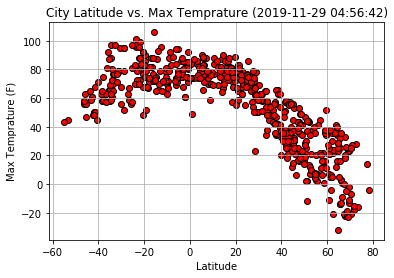

In [9]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker="o", facecolors="red", edgecolors="black")
plt.grid(True)

# Create a title, x label, and y label 
plt.title(f"City Latitude vs. Max Temprature ({analysis_date})")
plt.ylabel("Max Temprature (F)")
plt.xlabel("Latitude")
plt.savefig('images/max_temp.png')
plt.show()

#### Latitude vs. Humidity Plot

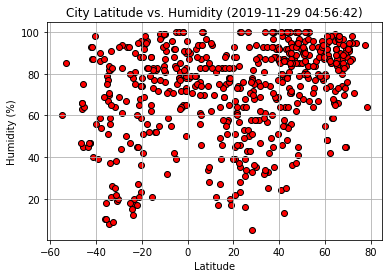

In [10]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker="o", facecolors="red", edgecolors="black")
plt.grid(True)

# Create a title, x label, and y label 
plt.title(f"City Latitude vs. Humidity ({analysis_date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig('images/humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

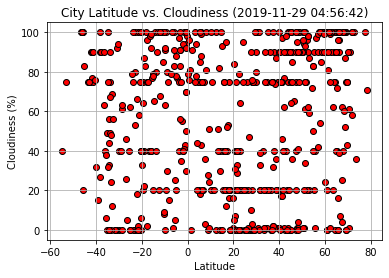

In [11]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker="o", facecolors="red", edgecolors="black")
plt.grid(True)

# Create a title, x label, and y label 
plt.title(f"City Latitude vs. Cloudiness ({analysis_date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig('images/cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

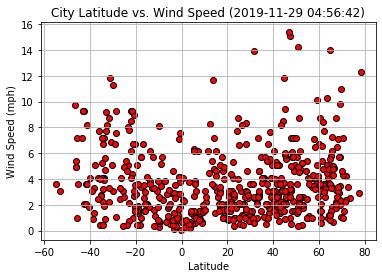

In [12]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker="o", facecolors="red", edgecolors="black")
plt.grid(True)

# Create a title, x label, and y label 
plt.title(f"City Latitude vs. Wind Speed ({analysis_date})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig('images/windspeed.png')
plt.show()

## Observations:
1. Max temperature vs. Latitude:  Based on the graphs, the max temprature decreases as we move further north of the Equator.
2. Humidity:  Based on the graphs, the percent humidity increases as the temprature rises. The  humidity seems equaly distributed crossthe range of latitudes.
3. The windspeed is higher at lower tempratures, across the range of latitudes.